In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

# Подготовка

## Датасет
Для тестирования LeNet-5 можно использовать датасет FashionMNIT, так как изображения в нем размера $28 \times 28$, как раз подходит под вход без ресайза

In [25]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

train_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=transforms.ToTensor(),
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=transforms.ToTensor(),
)

## Проверка использования GPU

In [26]:
torch.cuda.is_available()

True

In [27]:
torch.cuda.current_device()

0

In [28]:
torch.cuda.get_device_name()

'NVIDIA GeForce GTX 1070 Ti'

## Подготовка модели и лоадеров

In [29]:
batch_size = 64
train_loader = DataLoader(train_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

In [30]:
from backbone.lenet5 import LeNet5
from torch.optim import SGD
from torch.nn import CrossEntropyLoss

model = LeNet5()
optimizer = SGD(model.parameters(), lr=0.1, momentum=0.9)
loss_fn = CrossEntropyLoss()

In [33]:
from trainer.simple_trainer import SimpleTrainer
from metric.classification import Accuracy

trainer = SimpleTrainer(model, loss_fn=loss_fn, optimizer=optimizer)
trainer.set_metrics([Accuracy()])

# Обучение

In [34]:
epochs = 100

for e in range(epochs):
    print(f'Epoch {e+1}\n------------------')

    trainer.train(train_loader)
    trainer.test(test_loader)

Epoch 1
------------------
Loss: 2.304672
Loss: 2.303800
Loss: 2.298635
Loss: 2.306309
Loss: 2.306822
Loss: 2.306981
Loss: 2.305265
Loss: 2.304184
Loss: 2.305803
Loss: 2.307631
Loss: 0.036157
Accuracy: 6.250000%
Epoch 2
------------------
Loss: 2.303063
Loss: 2.305141
Loss: 2.298955
Loss: 2.305203
Loss: 2.306302
Loss: 2.306623
Loss: 2.304768
Loss: 2.304433
Loss: 2.305562
Loss: 2.306129
Loss: 0.036155
Accuracy: 6.250000%
Epoch 3
------------------
Loss: 2.302224
Loss: 2.305853
Loss: 2.299506
Loss: 2.304468
Loss: 2.305738
Loss: 2.306170
Loss: 2.304356
Loss: 2.304532
Loss: 2.305136
Loss: 2.304909
Loss: 0.036153
Accuracy: 6.250000%
Epoch 4
------------------
Loss: 2.301980
Loss: 2.305933
Loss: 2.300143
Loss: 2.303997
Loss: 2.305217
Loss: 2.305724
Loss: 2.304013
Loss: 2.304558
Loss: 2.304713
Loss: 2.304106
Loss: 0.036153
Accuracy: 6.250000%
Epoch 5
------------------
Loss: 2.302006
Loss: 2.305680
Loss: 2.300726
Loss: 2.303676
Loss: 2.304801
Loss: 2.305316
Loss: 2.303751
Loss: 2.304505
Loss:

KeyboardInterrupt: 

# Тестирование

In [35]:
trainer.test(test_loader)

Loss: 0.025986
Accuracy: 87.500000%


## Сохранение весов

In [12]:
torch.save(model.state_dict(), 'weights/lenet5/FashionMNIT.pth')

# MNIST

In [44]:
train_data = datasets.MNIST(
    root='data/',
    train=True,
    download=True,
    transform=transforms.ToTensor(),
)

test_data = datasets.MNIST(
    root='data/',
    train=False,
    download=True,
    transform=transforms.ToTensor(),
)

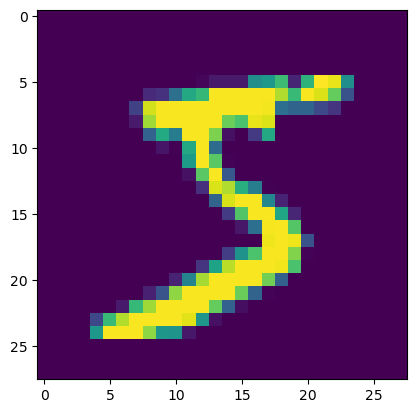

In [129]:
im = train_data[0][0]
im = im.permute(1, 2, 0).detach().cpu().numpy()
plt.imshow(im)

In [56]:
batch_size = 64
train_loader = DataLoader(train_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

In [48]:
model = LeNet5()
optimizer = SGD(model.parameters(), lr=0.1, momentum=0.9)
loss_fn = CrossEntropyLoss()

In [50]:
trainer = SimpleTrainer(model, loss_fn=loss_fn, optimizer=optimizer)
trainer.set_metrics([Accuracy()])

In [68]:
epochs = 20

for e in range(epochs):
    print(f'Epoch {e+1}\n------------------')

    trainer.train(train_loader)
    trainer.test(test_loader)

Epoch 1
------------------
Loss: 1.592176
Loss: 1.617027
Loss: 1.668752


KeyboardInterrupt: 

In [52]:
trainer.test(test_loader)

Loss: 0.025253
Accuracy: 87.500000%


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


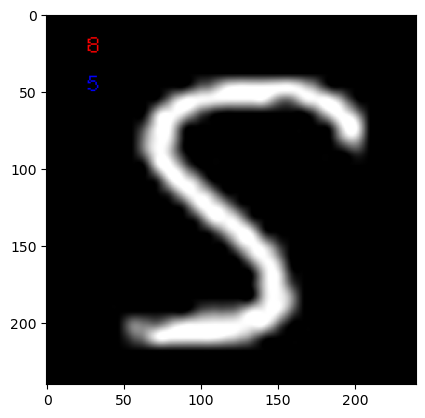

In [293]:
%matplotlib inline
from matplotlib import pyplot as plt
from visualize.samples import ClassificationSampler, SampleDrawer
import cv2

sampler = ClassificationSampler(model)
drawer = SampleDrawer(resize=(240, 240), convert=cv2.COLOR_GRAY2RGB)
for sample in sampler(test_data, 1):
    drawer.take_sample(sample)
    drawer.draw_labels(color=(255, 0, 0), pos=(25, 25))
    drawer.draw_labels(gt=True, color=(0, 0, 255), pos=(25, 50))
    im = drawer.get_drawing()
    plt.imshow(im)
    plt.show()
